In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d #For 3d projection and stuff
%matplotlib inline

# Three-Dimensional Plotting

#### Points and Lines

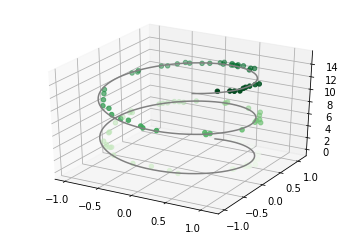

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Create a line
zline = np.linspace(0,15,1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Scatter points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.rand(100) #0.1 +... out of the axis
ydata = np.cos(zdata) + 0.1 * np.random.rand(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

#### Contour

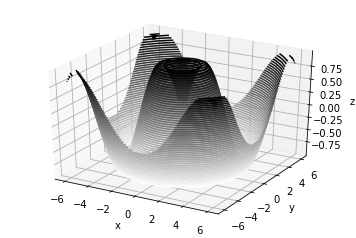

In [14]:
def f(x,y):
    return np.sin(np.sqrt(x**2 + y**2))
x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
fig = plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

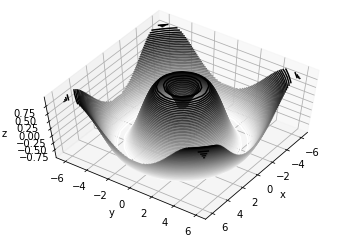

In [15]:
# Change the angle
ax.view_init(60,35)
fig

#### Triangulations

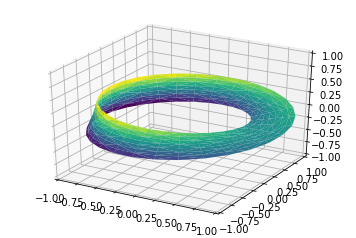

In [16]:
theta = np.linspace(0,2*np.pi,30)
w = np.linspace(-0.25,0.25,8)
w, theta = np.meshgrid(w,theta)
phi = 0.5 * theta
r = 1 + w*np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, 
                cmap='viridis', linewidths=0.2);
ax.set_xlim(-1,1); ax.set_ylim(-1,1); ax.set_zlim(-1,1);

# Geographic Data

The main tool for this is the Basemap toolkit. Modern solutions like Google Maps API may be a better choise for more intensive map visualizations

In [20]:
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\usuario1\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


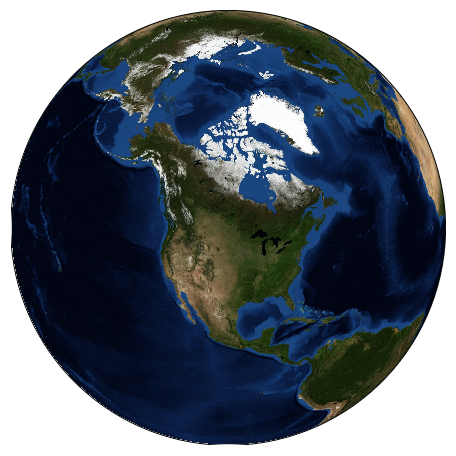

In [22]:
plt.figure(figsize=(8,8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [24]:
from itertools import chain
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


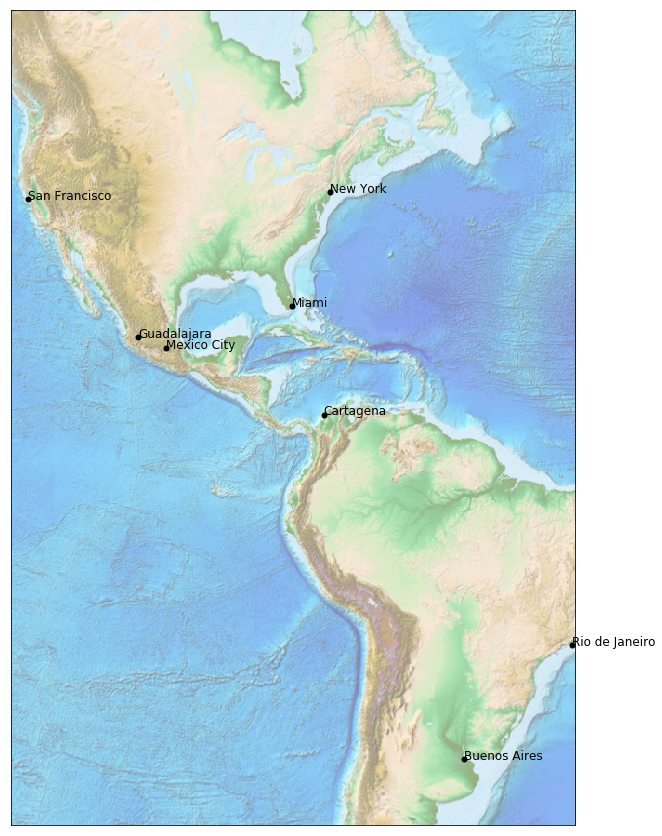

In [59]:
fig = plt.figure(figsize=(15,15))
m = Basemap(projection='lcc', resolution=None,
            width=9E6, height=13E6,
            lat_0=10, lon_0=-80)
m.etopo(scale=0.5, alpha=0.5)
# Map random places I've been to
places = {'San Francisco':(-122.4,37.7), 'Miami':(-80.2,25.8), 
          'New York':(-74.0,40.7), 'Cartagena':(-75.5,10.4),
          'Rio de Janeiro':(-43.2,-22.9),'Buenos Aires':(-58.4,-34.6), 
          'Mexico City':(-99.1,19.4), 'Guadalajara':(-103.3,20.7)}
for name, coor in places.items():
    x, y = m(coor[0],coor[1])
    plt.plot(x,y,'ok',markersize=5)
    plt.text(x,y, name , fontsize=12);

#### Drawing Boundaries

C:\Users\usuario1\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\usuario1\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


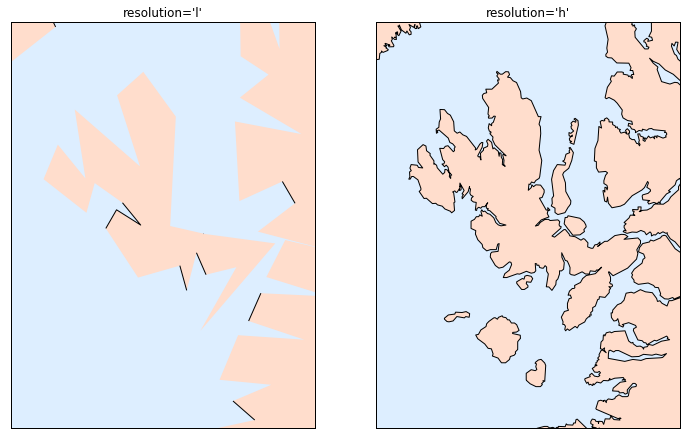

In [68]:
fig, ax = plt.subplots(1,2,figsize=(12,8))
for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
    width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

#### Plotting Data on Maps

contour()/contourf(): Draw contour lines or filled contours<br>
imshow(): Draw an image<br>
pcolor()/pcolormesh(): Draw a pseudocolor plot for irregular/regular meshes<br>
plot(): Draw lines and/or markers<br>
scatter(): Draw points with markers<br>
quiver(): Draw vectors<br>
barbs(): Draw wind barbs<br>
drawgreatcircle(): Draw a great circle<br>

In [71]:
cities = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv')

In [72]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


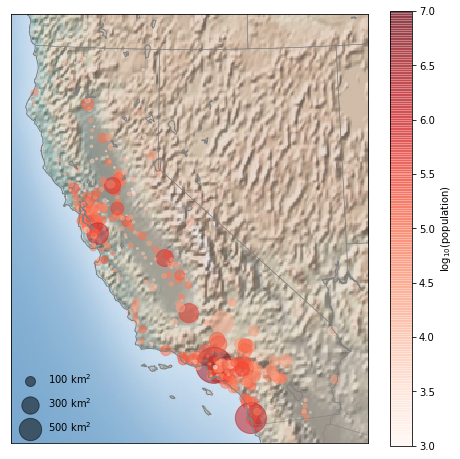

In [89]:
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True, c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. Colormap and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7) #Limits the colors

for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
labelspacing=1, loc='lower left');